In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('bengaluru_house_prices.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.shape

(13320, 9)

In [4]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [5]:
df['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [6]:
df['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [7]:
df.head(1)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07


In [8]:
df2 = df.drop(['area_type','availability','society','balcony'],axis = 'columns')
df2.shape


(13320, 5)

<h2 style='color:blue'>Data Cleaning: Handle NA values</h2>

In [9]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [10]:
# df2['bath'] = df2['bath'].fillna(0)
# df2['size'] = df2['size'].fillna('0')
# print(df2.isnull().sum())
df3 = df2.dropna()
print(df3.isnull().sum())

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64


In [11]:
print(df3.isnull().sum())
print(df3.shape)

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64
(13246, 5)


<h2 style='color:blue'>Feature Engineering</h2>

**Add new feature(integer) for bhk (Bedrooms Hall Kitchen)**

In [12]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [13]:
df3['bhk'] = df3['size'].apply(lambda x:int(x.split(' ')[0]))
df3.head()

<ipython-input-13-70dad0ca4423>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x:int(x.split(' ')[0]))


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [14]:
df3.bhk.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [15]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

**Explore total_sqft feature**

In [16]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [17]:
#df3[df3.total_sqft.apply(is_float)]# where it returns True
df3[~df3.total_sqft.apply(is_float)].head(10) # only where it returns false

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


**Above shows that total_sqft can be a range (e.g. 2100-2850). For such case we can just take average of min and max value in the range. There are other cases such as 34.46Sq. Meter which one can convert to square ft using unit conversion. I am going to just drop such corner cases to keep things simple**

In [18]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [19]:
# converting range into mean or avg 
def convert_range_to_mean(x):
    tokens = x.split('-')
    if len(tokens)==2:
        return ( ( float(tokens[0]) + float(tokens[1]) )/2 )
    try:
         return float(x)
    except:
         return None
         

In [20]:
convert_range_to_mean('2166')

2166.0

In [21]:
convert_range_to_mean('2166parch')

In [22]:
convert_range_to_mean('2100 - 2000')

2050.0

In [23]:
df4 = df3.copy()
#print(df4.isnull().sum())
#df4.total_sqft.apply(convert_range_to_mean)
df4.total_sqft = df4.total_sqft.apply(convert_range_to_mean)
df4 = df4[ df4.total_sqft.notnull() ]
print(df4.isnull().sum())
print(df4.shape)

location      0
size          0
total_sqft    0
bath          0
price         0
bhk           0
dtype: int64
(13200, 6)


In [24]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

<h2 style="color:blue">Feature Engineering</h2>

**Add new feature called price per square feet**

In [25]:
df5 = df4.copy()
df5['price_per_sqft'] = (df5.price * 100000) / df5.total_sqft
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [26]:
df5_stats = df5.price_per_sqft.describe()
df5_stats

count    1.320000e+04
mean     7.920759e+03
std      1.067272e+05
min      2.678298e+02
25%      4.267701e+03
50%      5.438331e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

**Examine locations which is a categorical variable. We need to apply dimensionality reduction technique here to reduce number of locations**

In [27]:
df5.location = df5['location'].apply(lambda x : x.strip()) # just removing extra space
location_stats = df5['location'].value_counts(ascending = False)
location_stats

Whitefield                 533
Sarjapur  Road             392
Electronic City            304
Kanakpura Road             264
Thanisandra                235
                          ... 
Jogupalya                    1
sarjapura main road          1
Chikka Gowdanapalya.         1
Kanakapura Road              1
Banashankari 2 nd Stage      1
Name: location, Length: 1287, dtype: int64

In [28]:
location_stats.values.sum()

13200

In [29]:
len(location_stats[location_stats<=10])

1047

In [30]:
len(location_stats[location_stats>10])

240

In [31]:
#dir(location_stats)

In [32]:
len(location_stats)

1287

<h2 style="color:blue">Dimensionality Reduction</h2>
**Any location having less than 10 data points should be tagged as "other" location. This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns**

In [33]:
less_than_10 = location_stats[location_stats<=10]
print(len(df5.location.unique()))
print(len(less_than_10))

1287
1047


In [34]:
less_than_10 = location_stats[location_stats<=10]
df5['location'] = df5['location'].apply(lambda x : "other" if x in less_than_10 else x)
len(df5.location.unique())

241

In [35]:
len(df5.location.unique())

241

In [36]:
df5['location'].value_counts(ascending = False)

other                        2872
Whitefield                    533
Sarjapur  Road                392
Electronic City               304
Kanakpura Road                264
                             ... 
HAL 2nd Stage                  11
2nd Phase Judicial Layout      11
Bommenahalli                   11
Pattandur Agrahara             11
Kodigehalli                    11
Name: location, Length: 241, dtype: int64

In [37]:
print(len(df5['location'].value_counts()))
print(df5.shape)

241
(13200, 7)


In [38]:
df5.to_csv('feature_engg_done.csv',index = False)

<h2 style="color:white">Outlier Removal Using Business Logic</h2>
**As a data scientist when you have a conversation with your business manager (who has expertise in real estate), he will tell you that normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft**

In [39]:
df5[(df5.total_sqft/df5.bhk)<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [40]:
df5.shape

(13200, 7)

In [41]:
df6 = df5[~( (df5.total_sqft/df5.bhk) <300 )]
df6.shape

(12456, 7)

<h2 style='color:white'>Outlier Removal Using Standard Deviation and Mean</h2>

In [ ]:
# focusing on price_per_sqft feature
#df6.head()
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

**Here we find that min price per sqft is 267 rs/sqft whereas max is 12000000, this shows a wide variation in property prices. We should remove outliers per location using mean and three standard deviation**

In [ ]:
def remove_spaces_left_right(x):
    x = x.lstrip(' ')
    x = x.rstrip(' ')
    return x



def remove_pps_outlier(df):
    df_out = pd.DataFrame()
    for key,subdf in df.groupby('location'):
        #(key)
        #print(subdf)
        m = np.mean(subdf['price_per_sqft'])
        s = np.std(subdf['price_per_sqft']) 
        s3 = 3 * np.std(subdf['price_per_sqft']) 
        df_cleaned = subdf[ ( subdf.price_per_sqft<(m+s) ) & ( subdf.price_per_sqft > (m-s) ) ]
        df_cleaned['location'] = df_cleaned.location.apply(remove_spaces_left_right)
        df_out = pd.concat([df_out,df_cleaned],ignore_index = True)
    return df_out

    

df7 = remove_pps_outlier(df6)
df7.shape


<ipython-input-42-eb88952bfc61>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['location'] = df_cleaned.location.apply(remove_spaces_left_right)
<ipython-input-42-eb88952bfc61>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['location'] = df_cleaned.location.apply(remove_spaces_left_right)
<ipython-input-42-eb88952bfc61>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

(10242, 7)

## Assuming our data is normally distributed
we will use mean+3std and mean-3std to find and remove outliers

In [ ]:
# using z-score to remove outliers
#Z-scores range from -3 standard deviations  up to +3 standard deviations
#ddof = 0 is used for faster compution of rows
# pandas.DataFrame.all
# Return whether all elements are True, potentially over an axis.
# from scipy import stats
# import numpy as np
# z_scores = stats.zscore(df6.total_sqft)
# abs_z_scores = np.abs(z_scores)
# print(abs_z_scores)
# print(df6.shape)
# print(df6[abs_z_scores<3].shape)
# df6 = df6[abs_z_scores<3] 


In [ ]:

# df6['zscore'] = (df6.total_sqft - df6.total_sqft.mean())/df6.total_sqft.std(ddof=0)
# df6['zscore'].isnull().sum()

In [ ]:
df6.total_sqft.isnull().sum()

0

In [ ]:
df5.total_sqft.isnull().sum()

0

In [ ]:
df4.total_sqft.isnull().sum()

0

In [ ]:
df3.total_sqft.isnull().sum()

0

In [ ]:
df4.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
bhk           0
dtype: int64

**Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like**

          location   size  total_sqft  bath  price  bhk  price_per_sqft
5725  Rajaji Nagar  3 BHK      1640.0   3.0  229.0    3    13963.414634
5726  Rajaji Nagar  3 BHK      2390.0   3.0  415.0    3    17364.016736
5727  Rajaji Nagar  3 BHK      2390.0   3.0  410.0    3    17154.811715
5728  Rajaji Nagar  3 BHK      1725.0   3.0  200.0    3    11594.202899
5730  Rajaji Nagar  3 BHK      1640.0   3.0  223.0    3    13597.560976


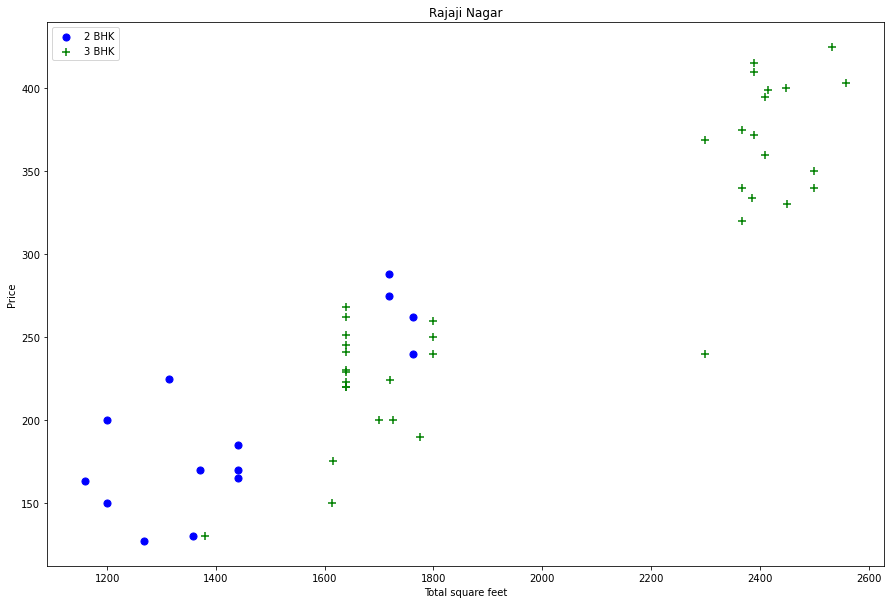

In [ ]:
def plot_price_by_location(df,location):
    bh2_df = df[ (df.location == location) & (df.bhk == 2) ]
    bh3_df = df[ (df.location == location) & (df.bhk == 3) ]
    print(bh3_df.head())
    plt.figure(figsize = (15,10))
    plt.scatter(bh2_df.total_sqft,bh2_df.price , marker = 'o',color = 'blue',label = "2 BHK",s = 50)
    plt.scatter(bh3_df.total_sqft,bh3_df.price , marker = '+',color = 'green',label = "3 BHK",s = 50)
    plt.xlabel('Total square feet')
    plt.ylabel('Price')
    plt.title(location)
    plt.legend()
    plt.show()

plot_price_by_location(df7,'Rajaji Nagar')



             location   size  total_sqft  bath  price  bhk  price_per_sqft
1895  Electronic City  3 BHK      1025.0   2.0   47.0    3     4585.365854
1897  Electronic City  3 BHK      1530.0   2.0   45.9    3     3000.000000
1898  Electronic City  3 BHK      1500.0   2.0   64.5    3     4300.000000
1901  Electronic City  3 BHK      1350.0   2.0   56.0    3     4148.148148
1910  Electronic City  3 BHK      1800.0   3.0   95.0    3     5277.777778


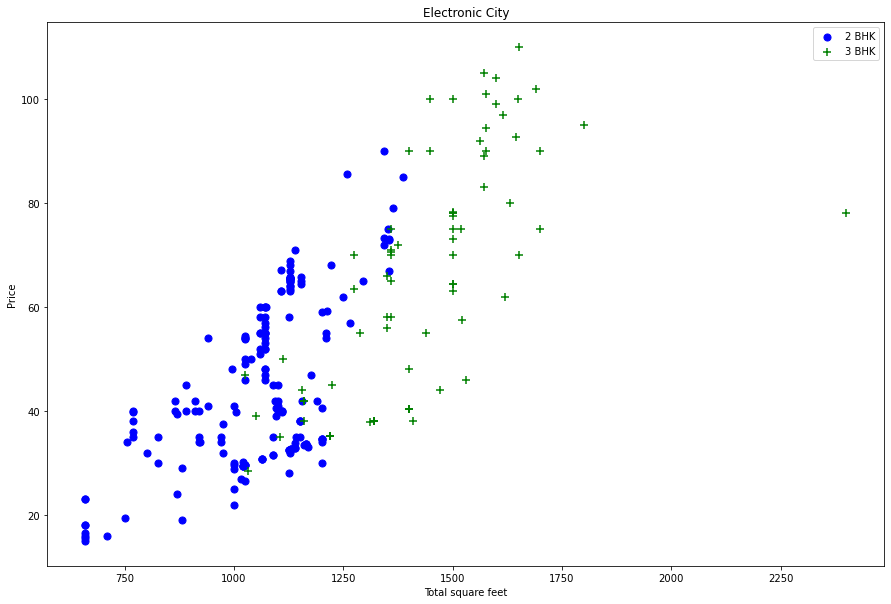

In [ ]:
plot_price_by_location(df7,'Electronic City')


In [ ]:
df7.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


In [ ]:
df7.location.unique()

array(['1st Block Jayanagar', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout', '5th Phase JP Nagar', '6th Phase JP Nagar',
       '7th Phase JP Nagar', '8th Phase JP Nagar', '9th Phase JP Nagar',
       'AECS Layout', 'Abbigere', 'Akshaya Nagar', 'Ambalipura',
       'Ambedkar Nagar', 'Amruthahalli', 'Anandapura', 'Ananth Nagar',
       'Anekal', 'Anjanapura', 'Ardendale', 'Arekere', 'Attibele',
       'BEML Layout', 'BTM 2nd Stage', 'BTM Layout', 'Babusapalaya',
       'Badavala Nagar', 'Balagere', 'Banashankari',
       'Banashankari Stage II', 'Banashankari Stage III',
       'Banashankari Stage V', 'Banashankari Stage VI', 'Banaswadi',
       'Banjara Layout', 'Bannerghatta', 'Bannerghatta Road',
       'Basavangudi', 'Basaveshwara Nagar', 'Battarahalli', 'Begur',
       'Begur Road', 'Bellandur', 'Benson Town', 'Bharathi Nagar',
       'Bhoganhalli', 'Billekahalli', 'Binny Pete', 'Bisuvanahalli',
       'Bommanahalli'

**We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.**
```
{
    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },
    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    },    
}
```
**Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment**

In [ ]:
def remove_bhk_outliers(df):
    excluded_indices = np.array([])
    for location,location_df in df.groupby('location'):
        #print(location)
        loc_bhk_stats = {}
        for bhk,bhk_df in location_df.groupby('bhk'):
            loc_bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0],
            }
            #print(loc_bhk_stats)
            #break
        for bhk,bhk_df in location_df.groupby('bhk'):
            # if price per sqft of 2 bed rooms is higher then 3 bed rooms exclude it  as an outlier
            previous_loc_bhk_stats = loc_bhk_stats.get(bhk-1)

            if previous_loc_bhk_stats and previous_loc_bhk_stats['count']>5:
                indices = bhk_df[ bhk_df.price_per_sqft < previous_loc_bhk_stats['mean'] ].index.values
                excluded_indices = np.append(excluded_indices,indices)
    return df.drop(excluded_indices,axis = 'index')
    print(excluded_indices)
            
df8 = remove_bhk_outliers(df7)
print(df8.shape)

(7317, 7)


          location   size  total_sqft  bath  price  bhk  price_per_sqft
5725  Rajaji Nagar  3 BHK      1640.0   3.0  229.0    3    13963.414634
5726  Rajaji Nagar  3 BHK      2390.0   3.0  415.0    3    17364.016736
5727  Rajaji Nagar  3 BHK      2390.0   3.0  410.0    3    17154.811715
5730  Rajaji Nagar  3 BHK      1640.0   3.0  223.0    3    13597.560976
5735  Rajaji Nagar  3 BHK      1800.0   3.0  260.0    3    14444.444444


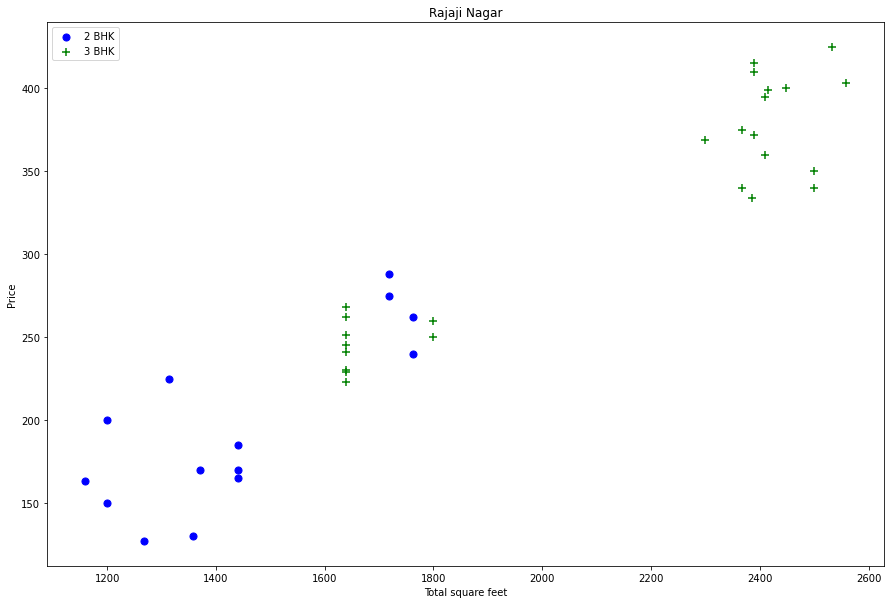

In [ ]:
plot_price_by_location(df8,'Rajaji Nagar')

**Plot same scatter chart again to visualize price_per_sqft for 2 BHK and 3 BHK properties**
**Based on above charts we can see that data points highlighted in red below are outliers and they are being removed due to remove_bhk_outliers function**

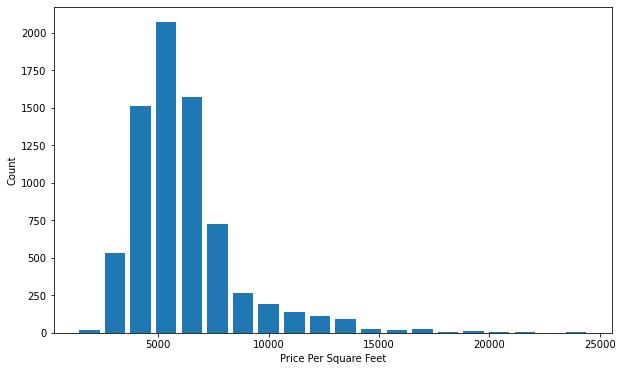

In [ ]:
plt.figure(figsize = (10,6))
plt.hist(df8.price_per_sqft,rwidth = 0.8,bins = 20)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")
plt.show()
#?plt.hist

<h2 style='color:red'>Outlier Removal Using Bathrooms Feature</h2>

In [ ]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [ ]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8483,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8572,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9306,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9637,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


**It is unusual to have 2 more bathrooms than number of bedrooms in a home**


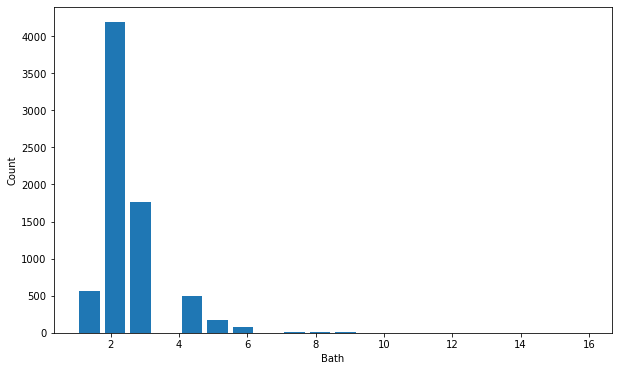

In [ ]:

plt.figure(figsize = (10,6))
plt.hist(df8.bath,rwidth = 0.8,bins = 20)
plt.xlabel("Bath")
plt.ylabel("Count")
plt.show()

In [ ]:
df8[df8.bath>df8.bhk+2]
#print(df8[df8.bath>df8.bhk+2].shape)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8408,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


**Again the business manager has a conversation with you (i.e. a data scientist) that if you have 4 bedroom home and even if you have bathroom in all 4 rooms plus one guest bathroom, you will have total bath = total bed + 1 max. Anything above that is an outlier or a data error and can be removed**

In [ ]:
# removing bath outliers
df9 = df8[df8.bath<df8.bhk+2]
df9.shape


(7239, 7)

In [ ]:
df9.head(2)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491


In [ ]:
df10 = df9.drop(['size','price_per_sqft'],axis = 'columns')
df10.head(2)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3


In [ ]:
df10.to_csv('data_cleaning_done.csv')

<h2 style='color:white'>Use One Hot Encoding For Location</h2>

In [ ]:
location_dummy = pd.get_dummies(df10['location'])
location_dummy.head(2)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df11 = pd.concat( [ df10,location_dummy.drop('other',axis = 'columns')],axis = 'columns' )
df11.head(2)

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#for location in df11.location.unique():
#    print(location)

In [ ]:
df12 = df11.drop('location',axis = 'columns')
df12.head(1)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = df12.drop('price',axis = 'columns')
y = df12.price
print(X.shape)
print(len(y))

(7239, 243)
7239


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.7971924202569202

<h2 style='color:white'>Use K Fold cross validation to measure accuracy of our LinearRegression model</h2>

In [ ]:
from sklearn.model_selection import cross_val_score,ShuffleSplit
cv = ShuffleSplit(n_splits = 5,test_size = 0.2,random_state = 42 )
cross_val_score(LinearRegression(),X,y,cv = cv)

array([0.79719242, 0.85349761, 0.86025581, 0.89009   , 0.81261021])

**We can see that in 5 iterations we get a score above 80% all the time. This is pretty good but we want to test few other algorithms for regression to see if we can get even better score. We will use GridSearchCV for this purpose**

<h2 style='color:white'>Find best model using GridSearchCV</h2>

In [ ]:
#--------------Best Way to Select a model-------------------
# from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
# from sklearn.linear_model import Lasso
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.svm import SVR

# def find_best_model(X,y):

#     algos = {

#         'linear_regression':
#         {
#             'model':LinearRegression(),
#             'params':{
#                 'normalize':[True,False],
#             }
#         },
#         'lasso':
#         {
#             'model':Lasso(),
#             'params':{
#                 'alpha':[1,2],
#                 'selection':['cyclic','random'],    
#             }

#         },
#         'svm':
#         {
#             'model':SVR(),
#             'params':{
#                 'kernel':['rbf','linear'],
#                 'C':[10**-3,10**-2,10**-1,10**0,10**1,10**2,10**3],
#             }
#         },
#         'dt':
#         {
#             'model':DecisionTreeRegressor(),
#             'params':{
#                 'criterion' : ["mse", "friedman_mse", "mae", "poisson"],
#                 'splitter': ['best','random'],
                
#             }
#         },
#         'rf':
#         {
#             'model':RandomForestRegressor(),
#             'params':{
#                 'n_estimators':[100,200,300,400],
#                 'criterion' : ["mse", "mae"],
#             }
#         }

#     }
#     scores = []
#     cv = ShuffleSplit(n_splits = 5,test_size = 0.2,random_state = 42)
#     for algo_key,config in algos.items():
#         rs = RandomizedSearchCV(config['model'],config['params'],cv = cv,return_train_score = False)
#         rs.fit(X,y)
#         scores.append({
#             'model_name':config['model'],
#             'best_score':rs.best_score_,
#             'best_params':rs.best_params_,      
#         })
#     return pd.DataFrame(scores,columns = ['model_name','best_score','best_params'])

# find_best_model(X,y)





In [ ]:
#?RandomForestRegressor

In [ ]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

def find_best_model(X,y):

    algos = {

        'linear_regression':
        {
            'model':LinearRegression(normalize = False),
            
        },
        'lasso':
        {
            'model':Lasso(alpha= 2,selection =  'cyclic'),
            

        },
        'svm':
        {
            'model':SVR(),
            
        },
        'dt':
        {
            'model':DecisionTreeRegressor(criterion =  'friedman_mse', splitter =  'best'),
            
        },
        'rf':
        {
            'model':RandomForestRegressor(),
            
        }

    }
    scores = []
    cv = ShuffleSplit(n_splits = 5,test_size = 0.2,random_state = 42)
    for algo_key,config in algos.items():
        cross_val_scores = cross_val_score(config['model'],X,y,cv = cv)
        model = config['model']
        model.fit(x_train,y_train)
        test_score = model.score(x_test,y_test)
       
        scores.append({
            'model_name':algo_key,
            'score_mean':cross_val_scores.mean(),
            'test_score':test_score,      
        })
    return pd.DataFrame(scores,columns = ['model_name','score_mean','test_score'])

model_df = find_best_model(X,y)
model_df.to_csv("model_scores.csv",index = False)





NameError: name 'X' is not defined

In [ ]:
model = LinearRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.7971924202569202

In [ ]:
#prints a tuple 
index = np.where(X.columns == "Indira Nagar")
print(index)
print(index[0])
print(index[0][0])

(array([116], dtype=int64),)
[116]
116


In [ ]:
X.head(1)

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
def predict_price(location,total_sqft,bath,bhk):
    loc_index = np.where(X.columns==location)[0][0]
    x = np.zeros(len(X.columns))
    x[0] = total_sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1
    return model.predict([x])[0]

In [ ]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

97.21063159897278

<h2 style='color:blue'>Export the tested model to a  file</h2>

In [ ]:
import joblib
joblib.dump(model,"price_model.joblib")
#model = joblib.load("price_model.joblib")

['price_model.joblib']

In [ ]:
df12.to_csv("final_dataset.csv",index = False)